#EDA

In [ ]:
import pandas as pd

In [ ]:
data= pd.read_excel ("/content/02 Customer Churn-Dataset.xlsx")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.515689,0.419566
std,0.368612,24.559481,30.090047,2265.000258,1.275299,1.250117
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,0.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,9.000000


In [ ]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [ ]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
import seaborn as sns
#Colores:
palette = sns.color_palette("Blues")
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

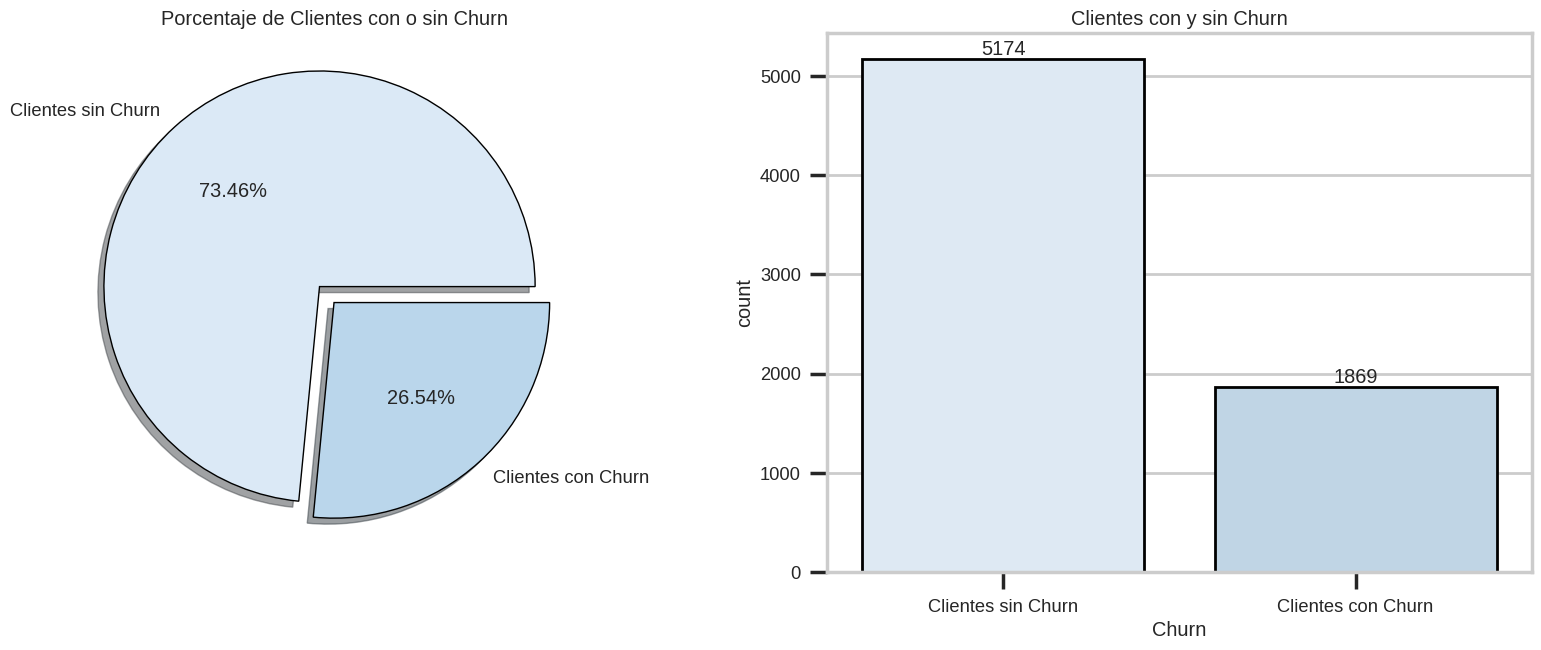

In [ ]:
import seaborn as sns
l1 = list(data['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]


#Gráfico Circular
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Clientes sin Churn','Clientes con Churn'],
        autopct = '%1.2f%%',
        explode = (0.1,0),
        shadow= True,
        colors = palette,
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Porcentaje de Clientes con o sin Churn');

#Gráfico de conteo

plt.subplot(1,2,2)
ax = sns.countplot(data = data,
                   x='Churn',
                   palette = palette,
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Clientes sin Churn','Clientes con Churn'])

plt.title('Clientes con y sin Churn')
plt.show()

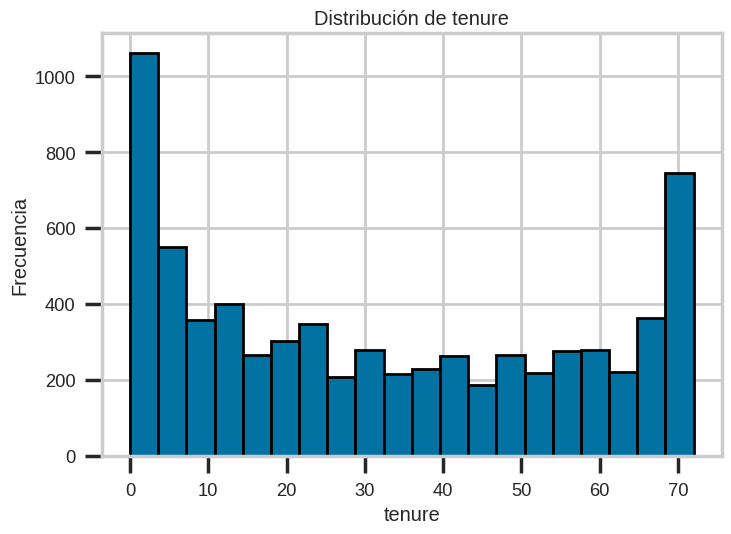

Asimetría de tenure: 0.24


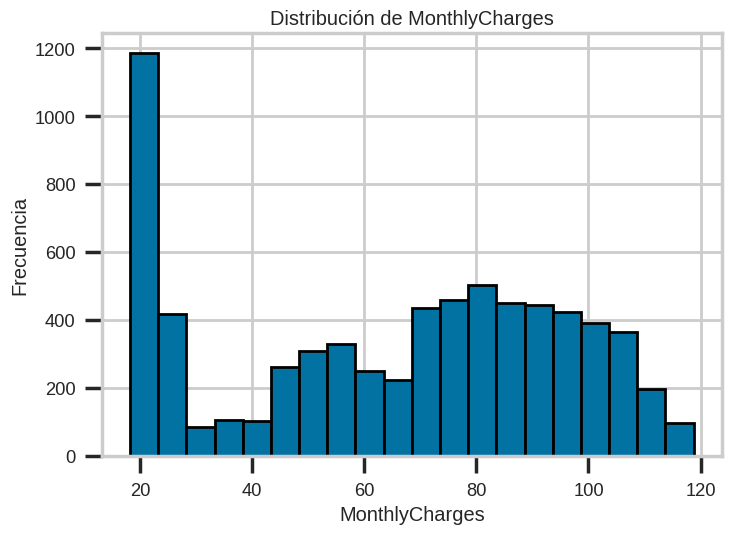

Asimetría de MonthlyCharges: -0.22


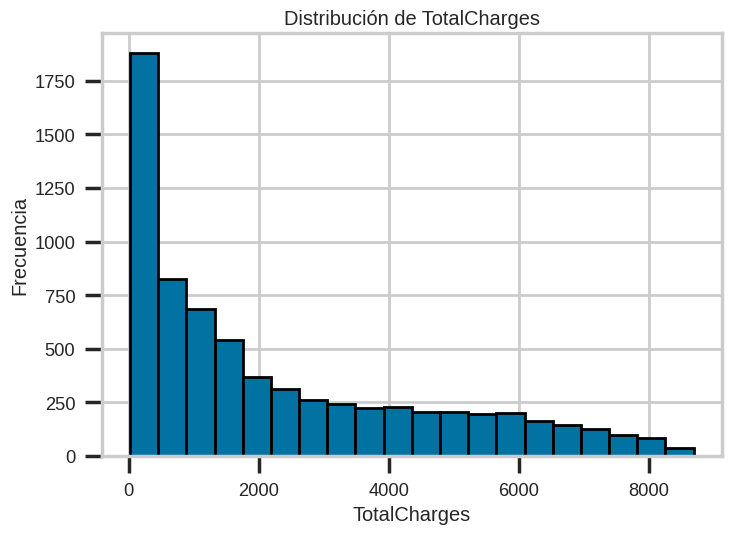

Asimetría de TotalCharges: 0.96


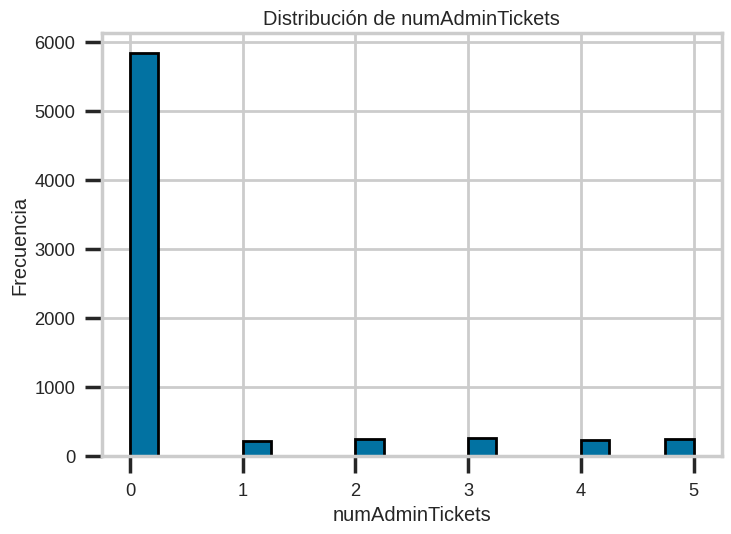

Asimetría de numAdminTickets: 2.45


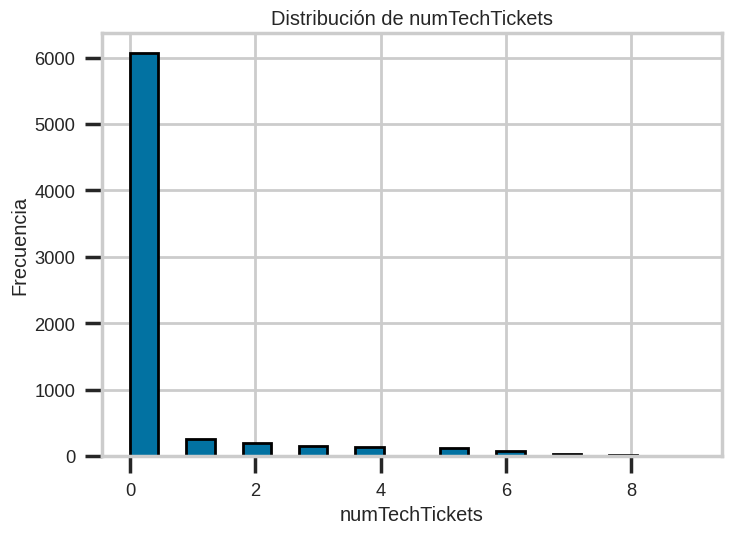

Asimetría de numTechTickets: 3.38


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Columnas numéricas
columnas_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']

for col in columnas_numericas:
    # Visualizar la distribución
    plt.hist(data[col], bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {col}')
    plt.grid(True)
    plt.show()

    # Calcular la asimetría
    asimetria = data[col].skew(skipna=True)
    print(f"Asimetría de {col}: {asimetria:.2f}")


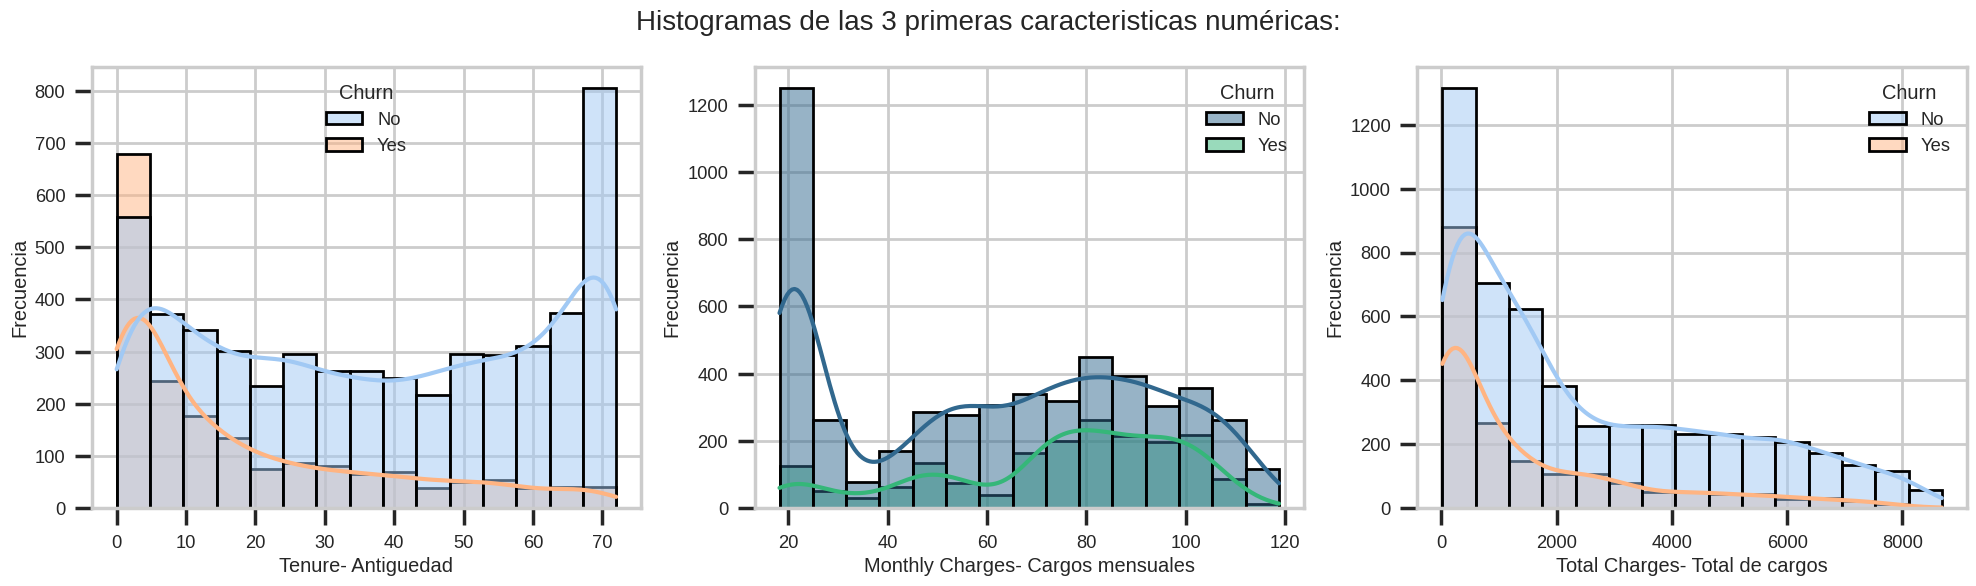

In [ ]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histogramas de las 3 primeras caracteristicas numéricas:', fontsize = 20)

ax1 = sns.histplot(x = data['tenure'],color= 'teal', hue= data['Churn'], ax= ax[0], bins= 15, kde= True, palette= 'pastel')
ax1.set(xlabel= 'Tenure- Antiguedad', ylabel= 'Frecuencia')

ax2 = sns.histplot(x = data['MonthlyCharges'], color= 'teal', hue= data['Churn'], ax= ax[1], bins= 15, kde= True, palette= 'viridis')
ax2.set(xlabel= 'Monthly Charges- Cargos mensuales', ylabel= 'Frecuencia')

ax3 = sns.histplot(x = data['TotalCharges'], color= 'teal', hue= data['Churn'], ax= ax[2], bins= 15, kde= True, palette= 'pastel')
ax3.set(xlabel= 'Total Charges- Total de cargos', ylabel= 'Frecuencia')

plt.tight_layout()
plt.show()

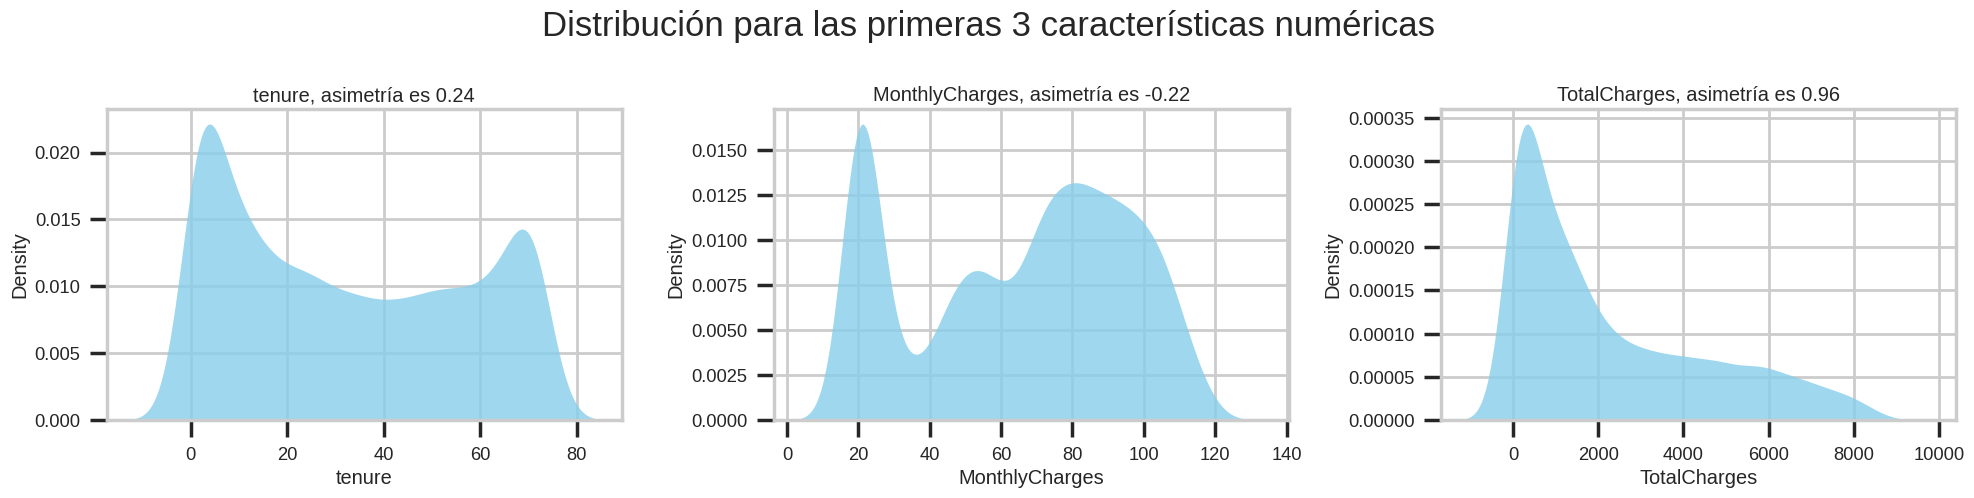

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def dist_custom(dataset, columnas_numericas, suptitle):

  rows = 1  # Solo visualizamos 3 características
  cols = 3
  fig, axs = plt.subplots(rows, cols, figsize=(20, 5))
  fig.suptitle(suptitle, y=1, size=25)
  axs = axs.flatten()

  color = 'skyblue'
  for i, data in enumerate(columnas_numericas[:3]):
      sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color=color)
      axs[i].set_title(data + ', asimetría es ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))


dist_custom(dataset=data, columnas_numericas=columnas_numericas, suptitle='Distribución para las primeras 3 características numéricas')
plt.tight_layout()






Se observa que las variables no están distribuidas normalmente. Antiguedad(tenure) y los cargos mensuales(Monthly Charges) se asemejan a una distribución binomial, mientras que el total de cargos (Total Charges) está sesgada.

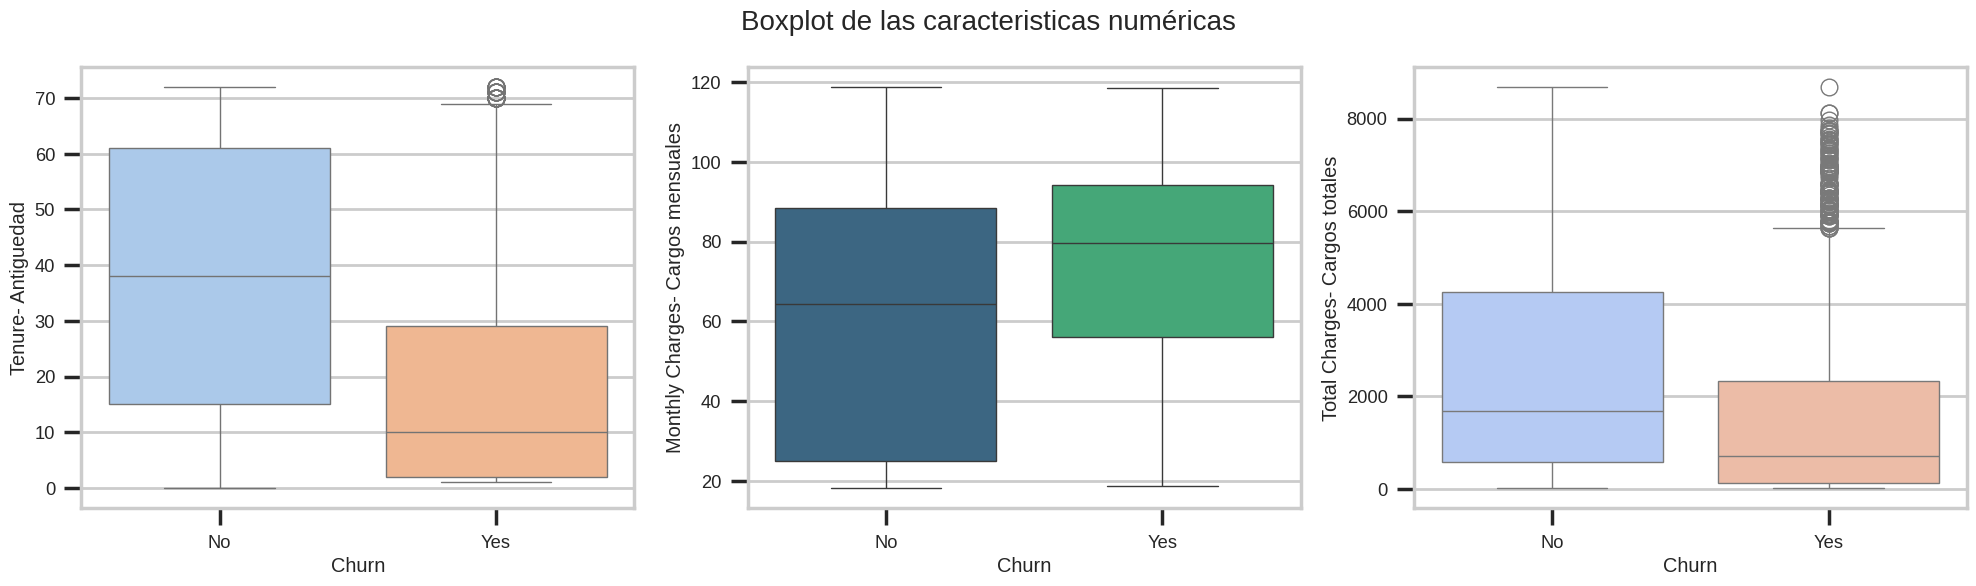

In [ ]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Boxplot de las caracteristicas numéricas', fontsize = 20)

ax1 = sns.boxplot(y = data['tenure'], x= data['Churn'], ax= ax[0], palette= 'pastel')
ax1.set(xlabel= 'Churn', ylabel= 'Tenure- Antiguedad')

ax2 = sns.boxplot(y = data['MonthlyCharges'], x= data['Churn'], ax= ax[1], palette= 'viridis')
ax2.set(xlabel= 'Churn', ylabel= 'Monthly Charges- Cargos mensuales')

ax3 = sns.boxplot(y = data['TotalCharges'], x= data['Churn'], ax= ax[2], palette= 'coolwarm')
ax3.set(xlabel= 'Churn', ylabel= 'Total Charges- Cargos totales')

plt.tight_layout()
plt.show()

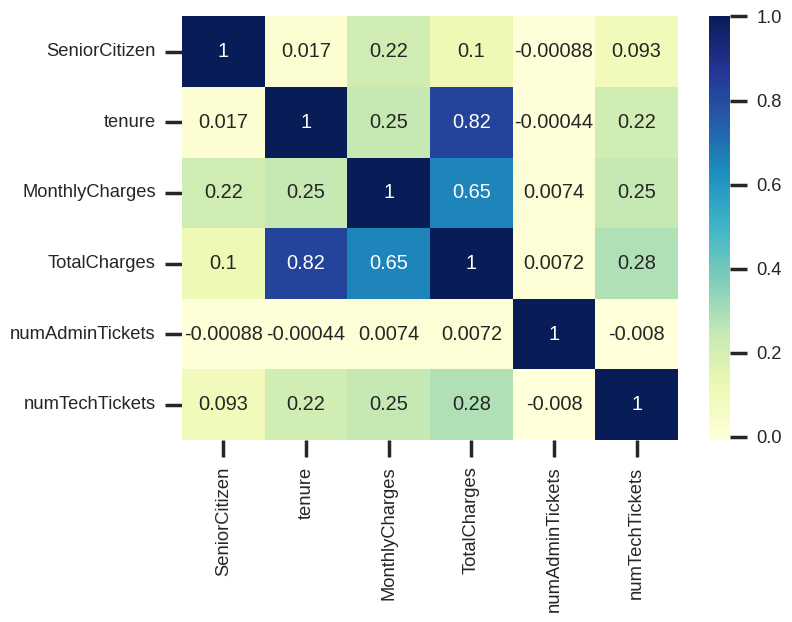

In [ ]:

import seaborn as sns
import pandas as pd

data = data.select_dtypes(exclude='object')  # Seleccionar solo columnas numéricas


corr_matrix = data.corr()  # Calcular la matriz de correlación

sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)  # Generar el heatmap
plt.show()

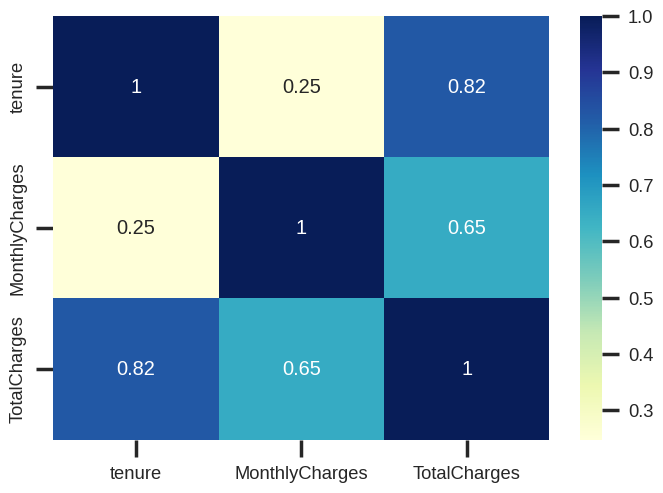

In [ ]:
import seaborn as sns
import pandas as pd

# Seleccionar solo las columnas 'tenure', 'MonthlyCharges' y 'TotalCharges'
columnas_interes = ['tenure', 'MonthlyCharges', 'TotalCharges']

data_filtrado = data[columnas_interes]  # DataFrame  solo de las columnas seleccionadas
corr_matrix_filtrada = data_filtrado.corr()  # Matriz de correlación
sns.heatmap(corr_matrix_filtrada, cmap='YlGnBu', annot=True)
plt.show()

In [ ]:
data_mapped.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets',
       'Churn'],
      dtype='object')

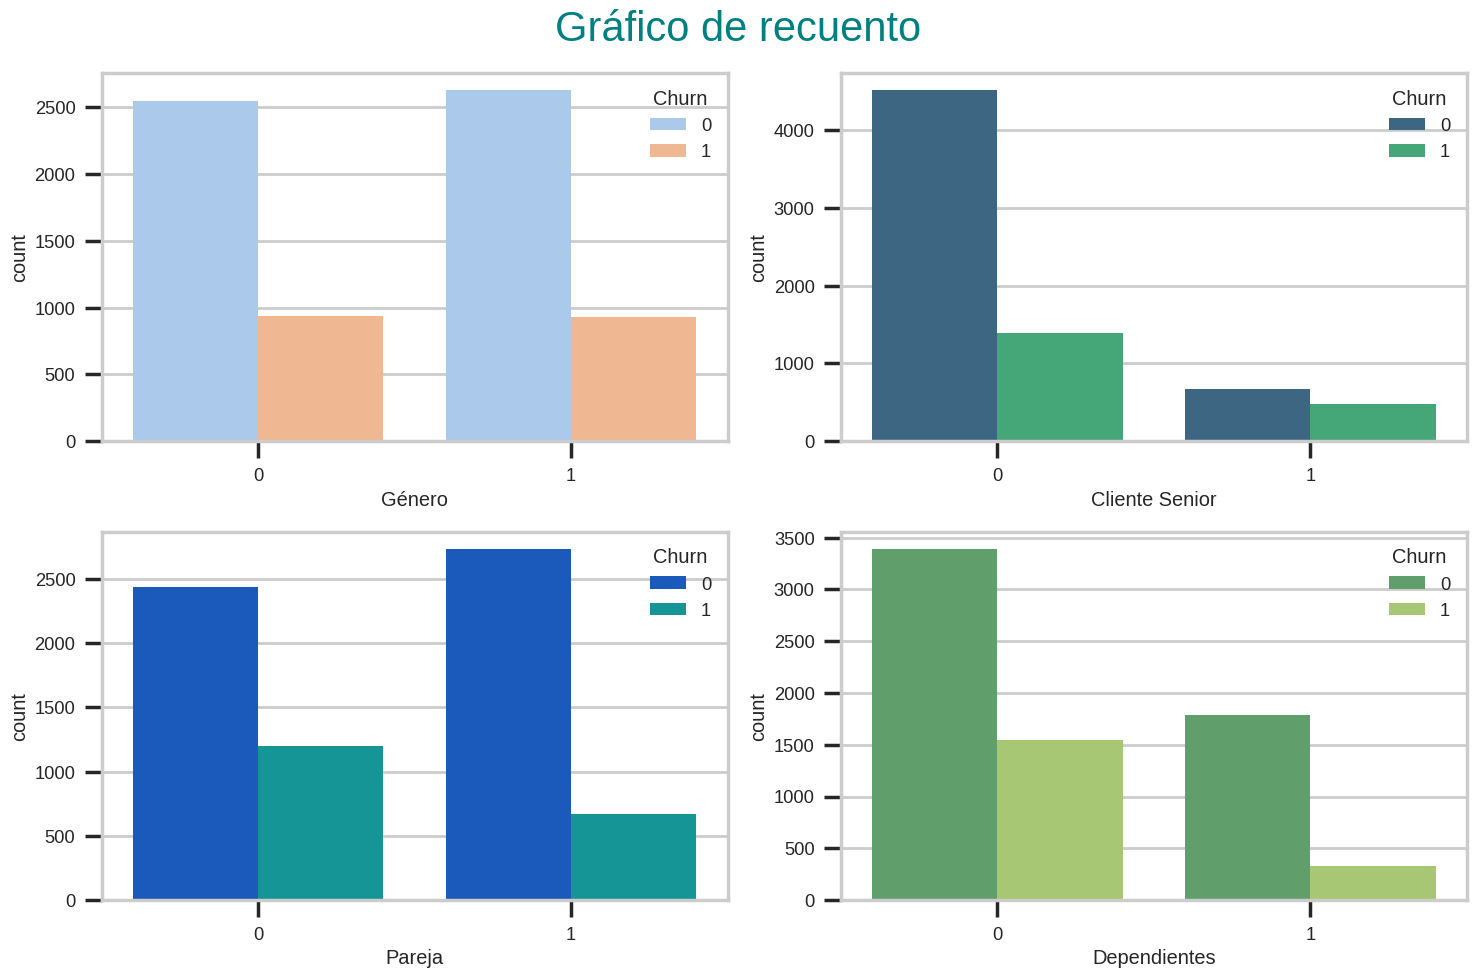

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
plt.suptitle('Gráfico de recuento', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= data_mapped, hue= 'Churn', ax= ax[0, 0], palette= 'pastel')
ax1.set(xlabel = 'Género')

ax2 = sns.countplot(x ='SeniorCitizen', data= data_mapped, hue= 'Churn', ax= ax[0, 1], palette= 'viridis')
ax2.set(xlabel = 'Cliente Senior')

ax3 = sns.countplot(x ='Partner', data= data_mapped, hue= 'Churn', ax= ax[1, 0], palette= 'winter')
ax3.set(xlabel = 'Pareja')

ax4 = sns.countplot(x ='Dependents', data= data_mapped, hue= 'Churn', ax= ax[1, 1], palette= 'summer')
ax4.set(xlabel = 'Dependientes')

plt.tight_layout()
plt.show()

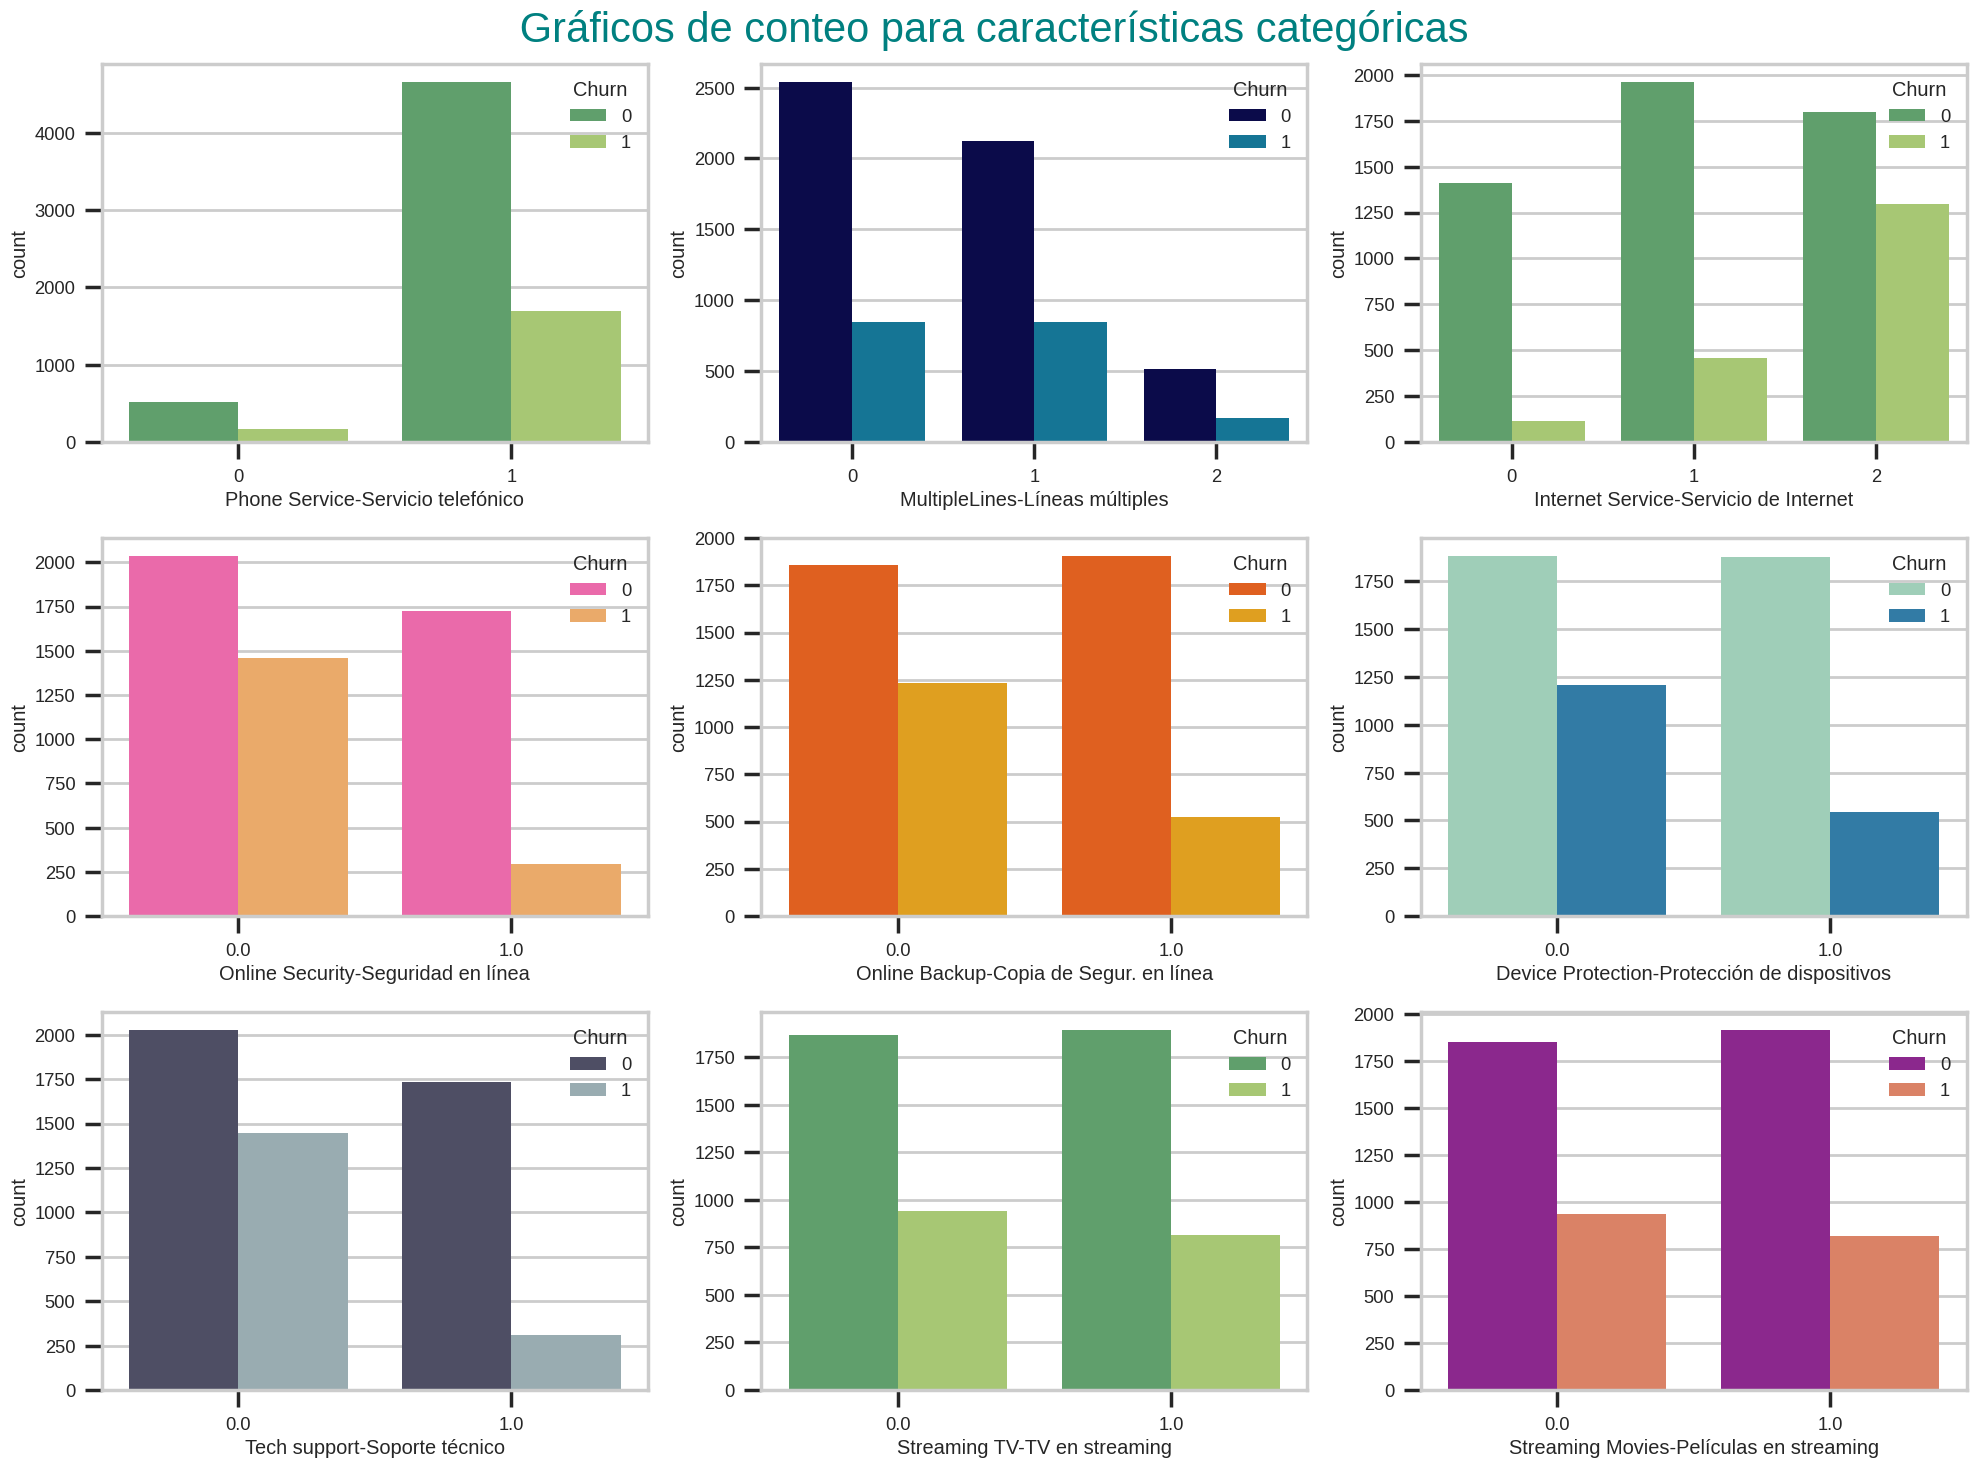

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (20, 15))

plt.suptitle(' Gráficos de conteo para características categóricas', fontsize = 30, color= 'teal')



ax1 = sns.countplot(x ='PhoneService', data= data_mapped, hue= 'Churn', ax= ax[0, 0], palette= 'summer')
ax1.set(xlabel = 'Phone Service-Servicio telefónico')

ax2 = sns.countplot(x ='MultipleLines', data= data_mapped, hue= 'Churn', ax= ax[0, 1], palette= 'ocean')
ax2.set(xlabel = 'MultipleLines-Líneas múltiples')

ax3 = sns.countplot(x ='InternetService', data= data_mapped, hue= 'Churn', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Internet Service-Servicio de Internet')

ax4 = sns.countplot(x ='OnlineSecurity', data= data_mapped, hue= 'Churn', ax= ax[1, 0], palette= 'spring')
ax4.set(xlabel = 'Online Security-Seguridad en línea')

ax5 = sns.countplot(x ='OnlineBackup', data= data_mapped, hue= 'Churn', ax= ax[1, 1], palette= 'autumn')
ax5.set(xlabel = 'Online Backup-Copia de Segur. en línea')

ax6 = sns.countplot(x ='DeviceProtection', data= data_mapped, hue= 'Churn', ax= ax[1, 2], palette= 'YlGnBu')
ax6.set(xlabel = 'Device Protection-Protección de dispositivos')

ax7 = sns.countplot(x ='TechSupport', data= data_mapped, hue= 'Churn', ax= ax[2, 0], palette= 'bone')
ax7.set(xlabel = 'Tech support-Soporte técnico')

ax8 = sns.countplot(x ='StreamingTV', data= data_mapped, hue= 'Churn', ax= ax[2, 1], palette= 'summer')
ax8.set(xlabel = 'Streaming TV-TV en streaming')

ax9 = sns.countplot(x ='StreamingMovies', data= data_mapped, hue= 'Churn', ax= ax[2, 2], palette= 'plasma')
ax9.set(xlabel = 'Streaming Movies-Películas en streaming')




plt.tight_layout()
plt.show()

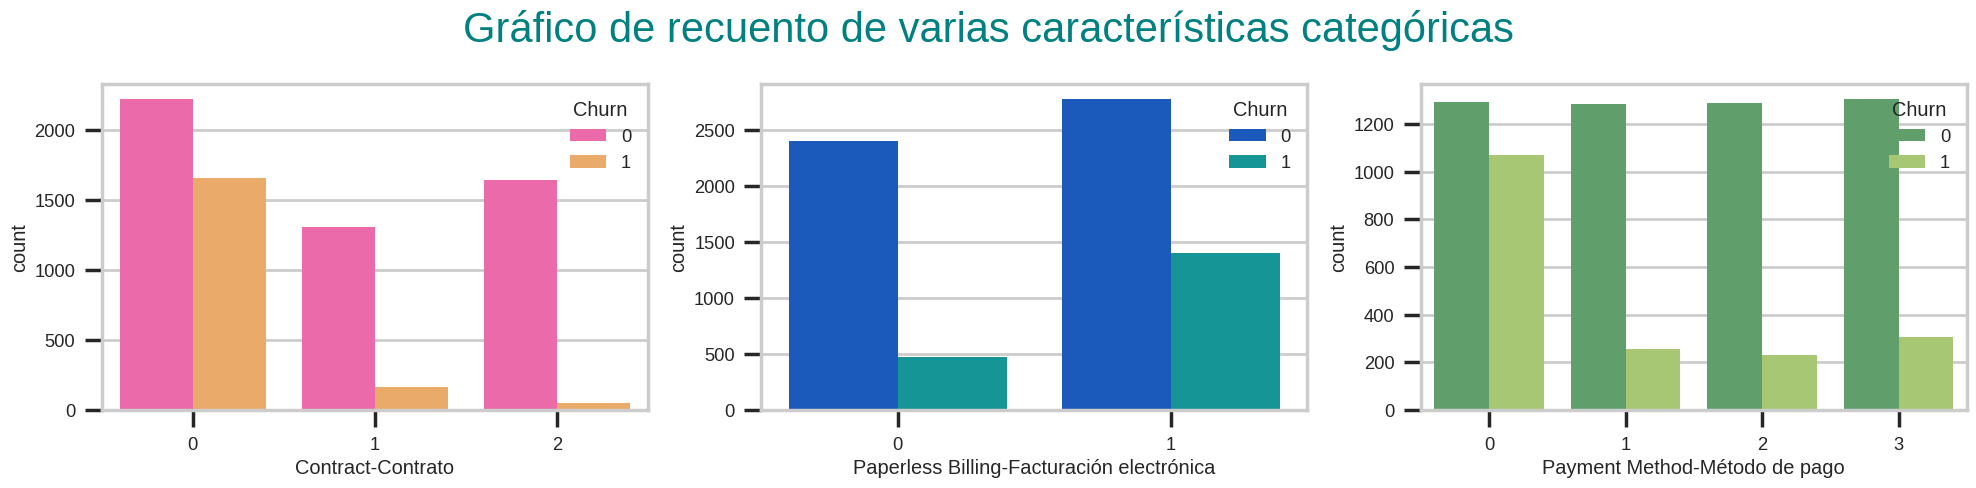

In [ ]:

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

plt.suptitle('Gráfico de recuento de varias características categóricas', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='Contract', data= data_mapped, hue= 'Churn', ax= ax[0], palette= 'spring')
ax1.set(xlabel = 'Contract-Contrato')

ax2 = sns.countplot(x ='PaperlessBilling', data= data_mapped, hue= 'Churn', ax= ax[1], palette= 'winter')
ax2.set(xlabel = 'Paperless Billing-Facturación electrónica')

ax3 = sns.countplot(x ='PaymentMethod', data= data_mapped, hue= 'Churn', ax= ax[2], palette= 'summer')
ax3.set(xlabel = 'Payment Method-Método de pago')

plt.tight_layout()
plt.show()

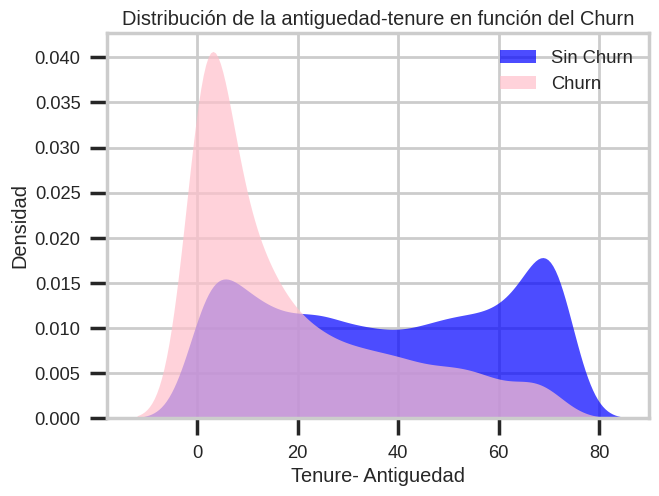

In [ ]:
#plt.figure(figsize=(7,3))

fig, ax = plt.subplots(figsize=(7,5))  # Adjust figure size as needed

ax = sns.kdeplot(data.tenure[(data_mapped["Churn"] == 0)], color='#0000FF', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(data.tenure[(data_mapped["Churn"] == 1)], color='#FFC0CB', fill= True, alpha=.7, linewidth=0)
ax.legend(["Sin Churn","Churn"],loc='upper right')
ax.set_ylabel('Densidad')
ax.set_xlabel('Tenure- Antiguedad')
ax.set_title('Distribución de la antiguedad-tenure en función del Churn')

plt.show()


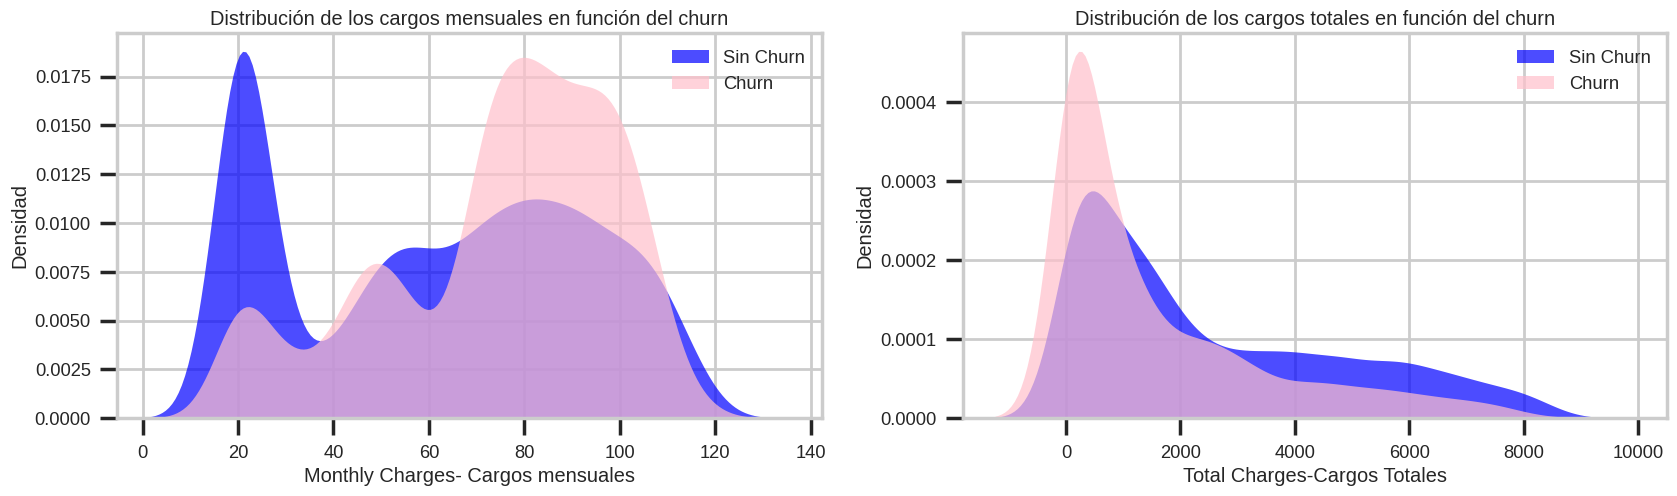

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(data.MonthlyCharges[(data_mapped["Churn"] == 0)], color= '#0000FF', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(data.MonthlyCharges[(data_mapped["Churn"] == 1)], color= '#FFC0CB', fill= True, alpha=.7, linewidth=0)
ax.legend(["Sin Churn","Churn"],loc='upper right')
ax.set_ylabel('Densidad')
ax.set_xlabel('Monthly Charges- Cargos mensuales')
ax.set_title('Distribución de los cargos mensuales en función del churn')

plt.subplot(1,2,2)
ax = sns.kdeplot(data.TotalCharges[(data_mapped["Churn"] == 0)], color= '#0000FF', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(data.TotalCharges[(data_mapped["Churn"] == 1)], color= '#FFC0CB', fill= True, alpha=.7, linewidth=0)
ax.legend(["Sin Churn","Churn"],loc='upper right')
ax.set_ylabel('Densidad')
ax.set_xlabel('Total Charges-Cargos Totales')
ax.set_title('Distribución de los cargos totales en función del churn')
plt.show()